In [1]:
import numpy as np
from tensorflow import keras
from keras.constraints import max_norm
from keras.utils import to_categorical
from keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

from keras.models import Sequential, load_model

from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten,BatchNormalization
from keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix


In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [3]:
y_train.shape

(50000, 1)

In [4]:
# normalayz the input from 0_255 to 0_1 by dividing by 255
x_train=x_train/255
x_test=x_test/255


In [5]:
encoder = OneHotEncoder(sparse=False)

In [6]:
#one hot encode outputs

y_train=encoder.fit_transform(y_train)
y_test=encoder.fit_transform(y_test)

C:\Users\Sarisa\ana3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Sarisa\ana3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [7]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

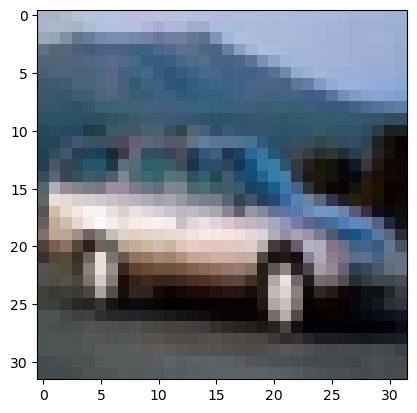

In [9]:
plt.imshow(x_train[4])

In [10]:
num_class=y_test.shape[1]

In [13]:
#bulding the model
models=Sequential()
models.add(Conv2D(32,(3,3),padding='same',input_shape=x_train.shape[1:],activation='relu'))
models.add(Dropout(0.2))
models.add(BatchNormalization())
models.add(Conv2D(32,(3,3),activation='relu'))
models.add(MaxPooling2D(2))
models.add(Dropout(0.2))
models.add(BatchNormalization())
models.add(Conv2D(64,(3,3),activation='relu'))
models.add(MaxPooling2D(2))
models.add(Conv2D(128,(3,3),activation='relu'))
models.add(MaxPooling2D(2))
models.add(Dropout(0.2))
models.add(BatchNormalization())
models.add(Flatten())
models.add(Dense(32,activation='relu'))
models.add(Dense(num_class,activation='softmax'))

In [14]:
models.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
models.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_3 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_3 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 15, 15, 32)       

In [16]:
# traininng moudel
history=models.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=15,batch_size=64)


Epoch 1/15


782/782 [==============================] - 42s 49ms/step - loss: 1.5594 - accuracy: 0.4339 - val_loss: 1.3518 - val_accuracy: 0.5191
Epoch 2/15
782/782 [==============================] - 34s 44ms/step - loss: 1.1932 - accuracy: 0.5750 - val_loss: 1.1008 - val_accuracy: 0.6080
Epoch 3/15
782/782 [==============================] - 34s 43ms/step - loss: 1.0285 - accuracy: 0.6397 - val_loss: 1.1517 - val_accuracy: 0.5958
Epoch 4/15
782/782 [==============================] - 34s 43ms/step - loss: 0.9327 - accuracy: 0.6735 - val_loss: 0.8962 - val_accuracy: 0.6868
Epoch 5/15
782/782 [==============================] - 33s 43ms/step - loss: 0.8623 - accuracy: 0.6974 - val_loss: 0.8877 - val_accuracy: 0.6832
Epoch 6/15
782/782 [==============================] - 34s 43ms/step - loss: 0.8115 - accuracy: 0.7147 - val_loss: 0.8665 - val_accuracy: 0.6951
Epoch 7/15
782/782 [==============================] - 33s 43ms/step - loss: 0.7717 - accuracy: 0.7284 - val_loss: 0.7653 - val_accurac

In [18]:
for key,val in history.history.items():
    print(key)

loss
accuracy
val_loss
val_accuracy


In [19]:
import pandas as pd


<Axes: >

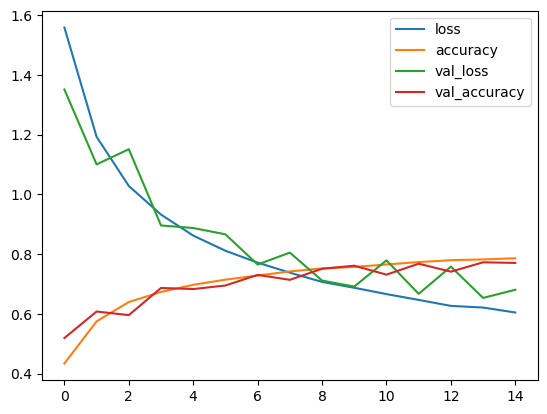

In [20]:
pd.DataFrame(history.history).plot()

<function matplotlib.pyplot.show(close=None, block=None)>

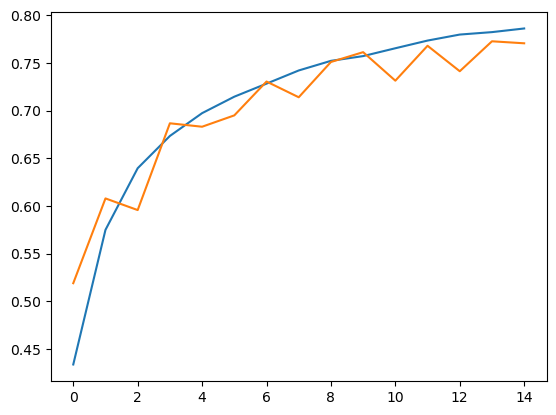

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show

In [22]:
models.save('CNN_cifar10.h5')

C:\Users\Sarisa\ana3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
model2=load_model('CNN_cifar10.h5')

In [24]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
     

In [25]:
import numpy as np
import seaborn as sns; sns.set()

In [29]:
y_test=y_test[:,np.newaxis]
#y_test = y_test.argmax(axis=1)


313/313 [==============================] - 3s 10ms/step


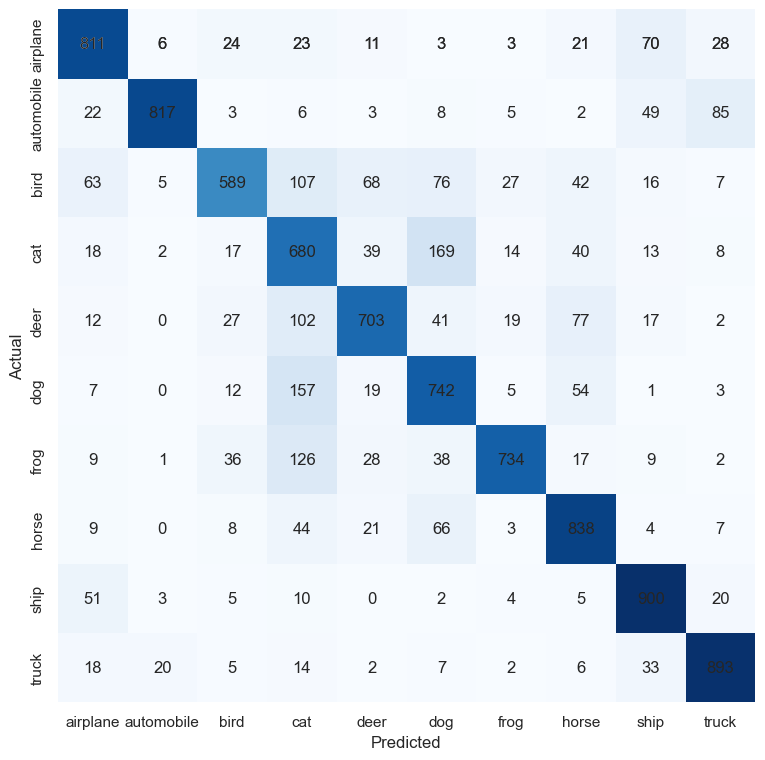

In [32]:
# Predicting test data
predictions = model2.predict(x_test)
predictions = np.argmax(predictions, axis=1)

# Creating confusion matrix
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# تغییر اعداد روی ستون‌ها به جای سطرها
for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j+0.5, i+0.5, str(cm[i, j]), ha='center', va='center')

plt.show()



2.15.0


2.15.0
